
## 네이버 금융 개별종목 수집
* FinanceDataReader를 통해 수집했던 데이터를 네이버 증권 웹 페이지를 통해 직접 수집합니다.


### Keyword

* html 파일 읽어오기
    * pd.read_html(url, encoding="cp949")

* 결측 데이터 제거하기(axis 0:행, 1:열)
    * table[0].dropna()

* 데이터 프레임 합치기
    * pd.concat([df1, df2, df3])

* 중복데이터 제거
    * df.drop_duplicates()

* 과학적 기수법
    * 1.210000e+02 => 121

* 날짜 column의 첫 row값 확인
    * date = df.iloc[0]["날짜"]

* 파일로 저장하기 
    * df.to_csv(file_name, index=False)

* 파일 읽어오기
    * pd.read_csv(file_name)

In [1]:
# 라이브러리 로드 : pandas, matplotlib.pyplot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야합니다.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨집니다.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

In [3]:
font_family = get_font_family()

In [4]:
# 사용가능한 폰트 스타일
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [5]:
# 그래프 스타일 설정
plt.style.use("seaborn")

# 폰트설정
plt.rc("font", family=font_family)

# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

<AxesSubplot:title={'center':'한글'}>

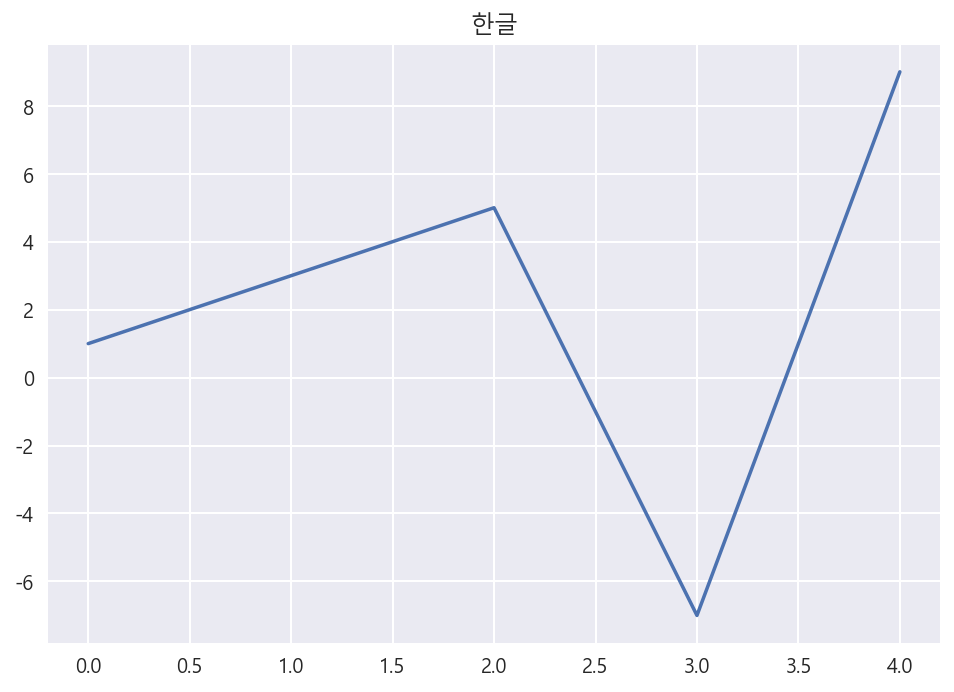

In [6]:
# 한글폰트가 제대로 동작하는지 확인하기
pd.Series([1, 3, 5, -7, 9]).plot(title="한글")

In [7]:
pip install certifi


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip



## 모든 업종코드 추출  

In [9]:
# -*- coding:utf-8 -*-
import re
import time
import ssl
context = ssl._create_unverified_context()
import requests
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen

#page = requests.get("https://finance.naver.com/sise/sise_group.naver?type=upjong",context=context)
result = urlopen("https://finance.naver.com/sise/sise_group.naver?type=upjong", context=context)
soup = bs(result.read(), "html.parser")

code_num=[]
code_name=[]
try :
    for td in soup('td'):  # td 안의
        for a in td('a'):  # a 태그 중에서
            name = a.get_text()  # 업종명 데이터 추출
            #print(name)
            time.sleep(0.2)
            cod = re.search('/sise/.*', a['href']).group(0)  # 필요부분추출후 그룹핑
            # 업종 url
            cod = str(cod)
            cod = re.sub(r'[^0-9]', '', cod)
            #
            #print(p)
            code_num.append(cod)
            code_name.append(name)
except:
    pass
#딕셔너리로 변환
dic = dict(zip(code_name, code_num))            
print(dic)

{'기타금융': '319', '담배': '275', '식품과기본식료품소매': '302', '전기제품': '283', '종이와목재': '318', '사무용전자제품': '338', '컴퓨터와주변기기': '293', '해운사': '323', '비철금속': '322', '화학': '272', '우주항공과국방': '284', '부동산': '280', '카드': '337', '무역회사와판매업체': '334', '판매업체': '265', '창업투자': '277', '에너지장비및서비스': '295', '운송인프라': '296', '백화점과일반상점': '264', '건강관리장비와용품': '281', '핸드셋': '292', '디스플레이장비및부품': '269', '가구': '303', '건축제품': '320', '자동차부품': '270', '생명과학도구및서비스': '262', '가스유틸리티': '312', '포장재': '311', '가정용품': '297', '식품': '268', '자동차': '273', '항공화물운송과물류': '326', '조선': '291', '복합유틸리티': '331', '소프트웨어': '287', '건축자재': '289', '상업서비스와공급품': '324', '무선통신서비스': '333', '기계': '299', '은행': '301', '기타': '25', '문구류': '332', '증권': '321', '생물공학': '286', '석유와가스': '313', '다각화된소비자서비스': '339', '생명보험': '330', '건강관리기술': '288', '항공사': '305', '다각화된통신서비스': '336', '음료': '309', '레저용장비와제품': '271', '교육서비스': '290', '전기장비': '306', '화장품': '266', '호텔,레스토랑,레저': '317', '복합기업': '276', '도로와철도운송': '329', 'IT서비스': '267', '인터넷과카탈로그소매': '308', '섬유,의류,신발,호화품': '274', '출판'

### read_html을 통해 url에 해당하는 업종 데이터 수집

In [62]:
#https://pbes.tistory.com/entry/%EC%A3%BC%EC%9A%94-%EC%A6%9D%EA%B6%8C%EC%82%AC%EA%B0%80-%EB%BD%91%EC%9D%80-2022%EB%85%84-%EC%9C%A0%EB%A7%9D-%EC%97%85%EC%A2%85-%EB%B0%8F-%EC%A2%85%EB%AA%A9
import time
data_frame=[dic['반도체와반도체장비'],dic['자동차'],dic['자동차부품'],dic['방송과엔터테인먼트']]

url_item=[]
for i in data_frame:
    url = "https://finance.naver.com/sise/sise_group_detail.naver?type=upjong&no=" + str(i)
    print(url)
    time.sleep(0.3)
    
    # read_html을 통해 해당 업종/테마를 수집합니다.
    table = pd.read_html(url, encoding="cp949")
    url_item.append(table)

print("수집완료")

https://finance.naver.com/sise/sise_group_detail.naver?type=upjong&no=278
https://finance.naver.com/sise/sise_group_detail.naver?type=upjong&no=273
수집완료


In [98]:
#https://pbes.tistory.com/entry/%EC%A3%BC%EC%9A%94-%EC%A6%9D%EA%B6%8C%EC%82%AC%EA%B0%80-%EB%BD%91%EC%9D%80-2022%EB%85%84-%EC%9C%A0%EB%A7%9D-%EC%97%85%EC%A2%85-%EB%B0%8F-%EC%A2%85%EB%AA%A9
import time
data_frame=[dic['반도체와반도체장비']]

url_item=[]
for i in data_frame:
    url = "https://finance.naver.com/sise/sise_group_detail.naver?type=upjong&no=" + str(i)
    print(url)
    time.sleep(0.3)
    
    # read_html을 통해 해당 업종/테마를 수집합니다.
    table = pd.read_html(url, encoding="cp949")
    url_item.append(table)

print("수집완료")

https://finance.naver.com/sise/sise_group_detail.naver?type=upjong&no=278
수집완료


### 업종 데이터 갯수확인

In [99]:
np.shape(url_item)

C:\Users\wldms\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(1, 3)

### 원하는 데이터의 위치확인
    *  수집해야할 데이터들은 table[0~78][2]에 존재한다

In [100]:
url_item[0][2]

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,토론실,Unnamed: 10,Unnamed: 11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,바른전자 *,4855.0,320.0,+7.06%,4855.0,4900.0,252270.0,1202.0,97377.0,NaN,NaN,NaN
2,아진엑스텍 *,11400.0,600.0,+5.56%,11400.0,11450.0,451632.0,5016.0,154118.0,NaN,NaN,NaN
3,로체시스템즈 *,6800.0,350.0,+5.43%,6790.0,6800.0,995971.0,6635.0,384120.0,NaN,NaN,NaN
4,엑시콘 *,10200.0,420.0,+4.29%,10200.0,10250.0,75941.0,759.0,40709.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
132,인텍플러스 *,16900.0,850.0,-4.79%,16900.0,16950.0,67802.0,1145.0,83320.0,NaN,NaN,NaN
133,하나머티리얼즈 *,34250.0,2350.0,-6.42%,34250.0,34300.0,216594.0,7457.0,287173.0,NaN,NaN,NaN
134,케이엔더블유 *,11200.0,1050.0,-8.57%,11200.0,11250.0,323681.0,3781.0,81448.0,NaN,NaN,NaN
135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
# dropna를 통해 결측치를 제거합니다. 전부 결측치 일시 제거 (how='all') 
tables = []
for i in range(0,1) :
  data = url_item[i][2]
  #print(data)
  #전부 결측치 일때 제거 (how='all') 
  data = data.dropna(how="all").dropna(axis=1, how="all")
  tables.append(data)

  finance_data = pd.concat(tables, axis=0, ignore_index=False)
print(finance_data)

           종목명      현재가     전일비     등락률     매수호가     매도호가       거래량    거래대금  \
1       바른전자 *   4855.0   320.0  +7.06%   4855.0   4900.0  252270.0  1202.0   
2      아진엑스텍 *  11400.0   600.0  +5.56%  11400.0  11450.0  451632.0  5016.0   
3     로체시스템즈 *   6800.0   350.0  +5.43%   6790.0   6800.0  995971.0  6635.0   
4        엑시콘 *  10200.0   420.0  +4.29%  10200.0  10250.0   75941.0   759.0   
5      바이옵트로 *   7000.0   200.0  +2.94%   7000.0   7010.0  156371.0  1064.0   
..         ...      ...     ...     ...      ...      ...       ...     ...   
130     가온칩스 *  22850.0  1100.0  -4.59%  22850.0  22900.0  196081.0  4505.0   
131    피에스케이 *  33150.0  1600.0  -4.60%  33100.0  33150.0  149877.0  4975.0   
132    인텍플러스 *  16900.0   850.0  -4.79%  16900.0  16950.0   67802.0  1145.0   
133  하나머티리얼즈 *  34250.0  2350.0  -6.42%  34250.0  34300.0  216594.0  7457.0   
134   케이엔더블유 *  11200.0  1050.0  -8.57%  11200.0  11250.0  323681.0  3781.0   

        전일거래량  
1     97377.0  
2    154118.0  
3  

### 파생변수 만들기

In [102]:
# datetime을 이용하여 조회한 날짜를 DataFrame에 기록합니다.
import datetime
today = datetime.datetime.today()
today = today.strftime("%Y-%m-%d")
today

'2022-09-14'

In [103]:
# 일자별로 데이터가 다르니 조회일자를 추가해 줍니다.
finance_data["조회일자"] = today
# 조회일자가 추가되었는지 확인해 봅니다.
finance_data.head()

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자
1,바른전자 *,4855.0,320.0,+7.06%,4855.0,4900.0,252270.0,1202.0,97377.0,2022-09-14
2,아진엑스텍 *,11400.0,600.0,+5.56%,11400.0,11450.0,451632.0,5016.0,154118.0,2022-09-14
3,로체시스템즈 *,6800.0,350.0,+5.43%,6790.0,6800.0,995971.0,6635.0,384120.0,2022-09-14
4,엑시콘 *,10200.0,420.0,+4.29%,10200.0,10250.0,75941.0,759.0,40709.0,2022-09-14
5,바이옵트로 *,7000.0,200.0,+2.94%,7000.0,7010.0,156371.0,1064.0,186064.0,2022-09-14


### 거래량과 거래대금 시각화

<AxesSubplot:ylabel='종목명'>

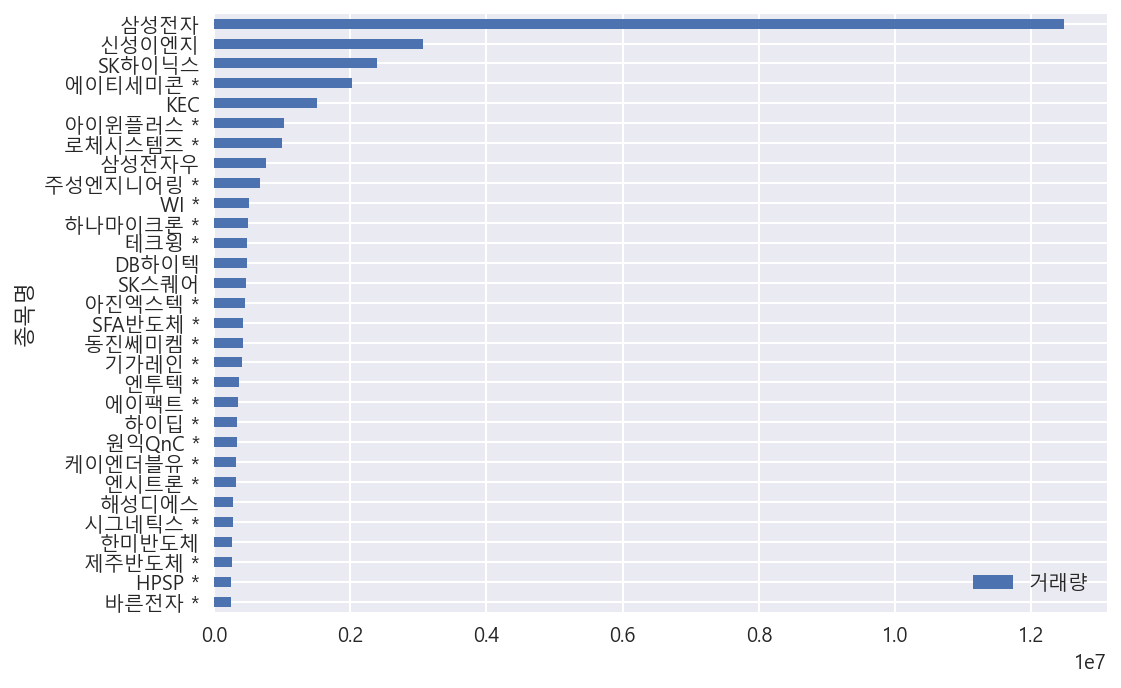

In [104]:
# bar chart로 그립니다.
# set_index를 해주면 plot시에 y axis label로 그려집니다.
# 거래량 상위 30개의 종목을 시각화 합니다.
finance_temp = finance_data[["종목명", "거래량"]].sort_values("거래량")
finance_temp.set_index("종목명").tail(30).plot.barh()

<AxesSubplot:ylabel='종목명'>

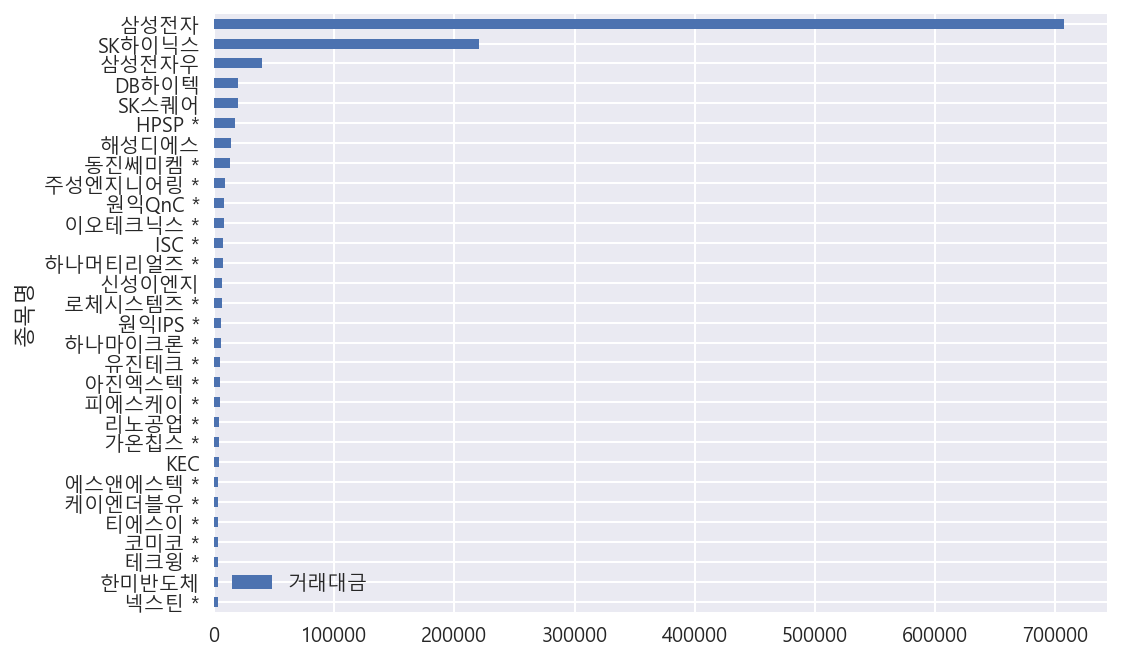

In [105]:
# 거래대금의 bar chart를 시각화 합니다.
finance_temp = finance_data[["종목명", "거래대금"]].set_index("종목명")
finance_temp = finance_temp.sort_values("거래대금").tail(30)
finance_temp.plot.barh()

## 종목코드 병합

### 종목명을 통해 미리 수집해 두었던 krx 전체 상장 종목 목록을 가져오거나 수집해서 데이터를 병합합니다.

In [106]:
# 기존 종목명에는 * 표시가 있기 때문에 * 문자를 제거해서 "종목명_전처리"라는 새로운 컬럼에 담아줍니다.
finance_data["종목명_전처리"] = finance_data["종목명"].str.replace("*", "")
finance_data["종목명_전처리"] = finance_data["종목명_전처리"].str.strip()

# finance_data 변수에 담긴 데이터프레임을 확인합니다.
finance_data[["종목명", "종목명_전처리"]].head()

,종목명,종목명_전처리
1,바른전자 *,바른전자
2,아진엑스텍 *,아진엑스텍
3,로체시스템즈 *,로체시스템즈
4,엑시콘 *,엑시콘
5,바이옵트로 *,바이옵트로


In [107]:
!pip --trusted-host pypi.org --trusted-host files.pythonhosted.org install finance-datareader


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [108]:
df_code=pd.read_csv('naver_finance0914.csv',encoding='cp949')

In [109]:
df_code.head()

,업종명,소속종목수,종목명,종목코드
0,우주항공과국방,16,에이트원,230980
1,우주항공과국방,16,한화에어로스페이스,012450
2,우주항공과국방,16,휴니드,005870
3,우주항공과국방,16,한화시스템,272210
4,우주항공과국방,16,아스트,067390


merge 를 통한 종목코드 만들기

In [110]:
# "Symbol", "Name" 만 사용하기 위해 따로 df_item_code_name 변수로 가져옵니다.
# 연결할 key 값으로 사용할 컬럼명을 같게 만들어 주면 전처리가 줄어듭니다.
# Symbol => "종목코드", Name => "종목명_전처리" 로 만들어주면 
# "종목명_전처리" 를 키값으로 합쳤을 때 전처리가 줄어듭니다.
code_name = df_code[["종목코드","종목명"]]
code_name.columns = ["종목코드", "종목명_전처리"]
code_name.head()

,종목코드,종목명_전처리
0,230980,에이트원
1,012450,한화에어로스페이스
2,005870,휴니드
3,272210,한화시스템
4,067390,아스트


In [111]:
# 종목갯수를 확인하기 위해 df의 행과 열의 수를 출력합니다.
finance_data.shape

(134, 11)

In [112]:
# 종목코드를 만들어주기 위해 종목명_전처리 컬럼을 기준으로 df_item_code_name 데이터프레임과 병합합니다.
# df
df = finance_data.merge(code_name, on="종목명_전처리", how='left')
df.shape

(134, 12)

In [132]:
df

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,조회일자,종목명_전처리,종목코드
0,바른전자 *,4855.0,320.0,+7.06%,4855.0,4900.0,252270.0,1202.0,97377.0,2022-09-14,바른전자,064520
1,아진엑스텍 *,11400.0,600.0,+5.56%,11400.0,11450.0,451632.0,5016.0,154118.0,2022-09-14,아진엑스텍,059120
2,로체시스템즈 *,6800.0,350.0,+5.43%,6790.0,6800.0,995971.0,6635.0,384120.0,2022-09-14,로체시스템즈,071280
3,엑시콘 *,10200.0,420.0,+4.29%,10200.0,10250.0,75941.0,759.0,40709.0,2022-09-14,엑시콘,092870
4,바이옵트로 *,7000.0,200.0,+2.94%,7000.0,7010.0,156371.0,1064.0,186064.0,2022-09-14,바이옵트로,222160
...,...,...,...,...,...,...,...,...,...,...,...,...
129,가온칩스 *,22850.0,1100.0,-4.59%,22850.0,22900.0,196081.0,4505.0,286330.0,2022-09-14,가온칩스,399720
130,피에스케이 *,33150.0,1600.0,-4.60%,33100.0,33150.0,149877.0,4975.0,252569.0,2022-09-14,피에스케이,319660
131,인텍플러스 *,16900.0,850.0,-4.79%,16900.0,16950.0,67802.0,1145.0,83320.0,2022-09-14,인텍플러스,064290
132,하나머티리얼즈 *,34250.0,2350.0,-6.42%,34250.0,34300.0,216594.0,7457.0,287173.0,2022-09-14,하나머티리얼즈,166090


종목상세정보 수집

In [113]:
# 전체 종목을 수집하기 전에 일부 종목을 먼저 수집합니다.
item_code = "272210"
item_name = "한화시스템"

In [114]:
# 종목상세정보를 위한 url을 확보합니다.
# item_code에는 종목코드 수집시에 마지막에 수집된 데이터가 남아있습니다.
item_url = f"https://finance.naver.com/item/main.nhn?code={item_code}"

item_url

'https://finance.naver.com/item/main.nhn?code=272210'

In [115]:
# read_html을 이용해 데이터를 수집합니다.
table_data = pd.read_html(item_url, encoding="cp949")
print(table_data)

[                    0                                        1  \
0  전일  14,800  14,800  고가  14,85014,850  (상한가  19,20019,200  )   
1    시가  14,40014,400        저가  14,30014,300  (하한가  10,400  )   

                        2  
0   거래량  494,949  494,949  
1  거래대금  7,218  7,218  백만  ,      매도상위      거래량     매수상위      거개량
0     NaN      NaN      NaN      NaN
1    키움증권  66695.0     키움증권  64995.0
2  신한금융투자  54425.0       삼성  52166.0
3    한국증권  49388.0     한국증권  45273.0
4  NH투자증권  47482.0   신한금융투자  43461.0
5      삼성  47100.0     KB증권  32057.0
6  외국계추정합      0.0  +16,472  16472.0,       날짜       종가      전일비       외국인        기관
0    NaN      NaN      NaN       NaN       NaN
1  09/14  14750.0   하향  50    -53182   +66,277
2  09/13  14800.0  하향  150   +50,724    -35460
3  09/08  14950.0   하향  50    -38467  +123,755
4  09/07  15000.0  하향  450   -352899    -44561
5  09/06  15450.0   상향  50    -31645    -11388
6  09/05  15400.0  상향  250  +106,348   +93,317
7    NaN      NaN      NaN       NaN      

In [116]:
# 제대로 수집이 되었는지 확인합니다.
table_data[3].iloc[:, [0, -1]]

,주요재무정보,최근 분기 실적
,주요재무정보,2022.09(E)
,주요재무정보,IFRS연결
0,매출액,5994.00
1,영업이익,350.00
2,당기순이익,210.00
3,영업이익률,5.83
4,순이익률,3.50
5,ROE(지배주주),NaN
6,부채비율,NaN
7,당좌비율,NaN


In [117]:
# tables의 원소값을 확인하여 원하는 데이터가 어디에 있는지 확인합니다.
pd.concat([table_data[8], table_data[9]]).set_index(0).T

,PERlEPS(2022.06),추정PERlEPS,PBRlBPS (2022.06),배당수익률l2021.12,동일업종 PER,동일업종 등락률
1,150.51배 l 98원,90.00배 l 163원,"1.27배 l 11,577원",1.09%,43.79배,-0.15%


컬럼명과 값 형태로 되어 있는 테이블만 사용


In [118]:
# 수집한 정보를 item_info에 list 형태로 관리합니다.
item_info = []

In [119]:
# 가장 최근의 주요재무정보를 가져와서 item_info 라는 변수에 담습니다.
finance_info = table_data[3].iloc[:, [0, -1]]
finance_info.columns = [0, 1]
item_info.append(finance_info)

In [120]:
# tables을 반복문으로 돌며 컬럼의 수가 2인 테이블만 따로 추출해 
# 위에서 만든 item_info 에 리스트 형태로 추가합니다.
for t in table_data:
    if t.shape[1] == 2:
        item_info.append(t)

In [121]:
# 위에서 만든 리스트의 값을 확인합니다.
item_info

[            0        1
 0         매출액  5994.00
 1        영업이익   350.00
 2       당기순이익   210.00
 3       영업이익률     5.83
 4        순이익률     3.50
 5   ROE(지배주주)      NaN
 6        부채비율      NaN
 7        당좌비율      NaN
 8         유보율      NaN
 9      EPS(원)   149.00
 10     PER(배)    99.50
 11     BPS(원)      NaN
 12     PBR(배)      NaN
 13   주당배당금(원)      NaN
 14   시가배당률(%)      NaN
 15    배당성향(%)      NaN,
           0              1
 0      시가총액  2조  7,866  억원
 1    시가총액순위       코스피 105위
 2     상장주식수      188919389
 3  액면가l매매단위  5,000원  l  1주,
              0          1
 0  외국인한도주식수(A)  188919389
 1  외국인보유주식수(B)    5480112
 2  외국인소진율(B/A)      2.90%,
            0                  1
 0  투자의견l목표주가  4.20매수  l  23,000
 1   52주최고l최저  19,450  l  11,950,
                    0                  1
 0   PERlEPS(2022.06)    150.51배  l  98원
 1          추정PERlEPS    90.00배  l  163원
 2  PBRlBPS (2022.06)  1.27배  l  11,577원
 3      배당수익률l2021.12              1.09%,
           0       1
 0  동일업종 PER  

In [122]:
# item_info[0] 의 컬럼명을 봅니다. 같은 컬럼이 아니면 행끼리 합칠 수 없습니다.
item_info[2]

,0,1
0,외국인한도주식수(A),188919389
1,외국인보유주식수(B),5480112
2,외국인소진율(B/A),2.90%


In [123]:
# concat을 이용하여 item_info를 하나의 DataFrame으로 만듭니다.
df_item = pd.concat(item_info)
df_item

,0,1
0,매출액,5994
1,영업이익,350
2,당기순이익,210
3,영업이익률,5.83
4,순이익률,3.5
5,ROE(지배주주),NaN
6,부채비율,NaN
7,당좌비율,NaN
8,유보율,NaN
9,EPS(원),149


In [124]:
# concat을 이용하여 item_info를 하나의 DataFrame으로 만듭니다.
df_item = pd.concat(item_info)
df_item

,0,1
0,매출액,5994
1,영업이익,350
2,당기순이익,210
3,영업이익률,5.83
4,순이익률,3.5
5,ROE(지배주주),NaN
6,부채비율,NaN
7,당좌비율,NaN
8,유보율,NaN
9,EPS(원),149


transpose를 통해 행과 열의 위치를 변경

In [125]:
df_item.set_index(0)

,1
0,
매출액,5994
영업이익,350
당기순이익,210
영업이익률,5.83
순이익률,3.5
ROE(지배주주),NaN
부채비율,NaN
당좌비율,NaN
유보율,NaN


In [126]:
# transpose는 .transpose() 혹은  .T 로 사용해 보실 수 있습니다.
df_item.set_index(0).T

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2022.06),추정PERlEPS,PBRlBPS (2022.06),배당수익률l2021.12,동일업종 PER,동일업종 등락률
1,5994,350,210,5.83,3.5,NaN,NaN,NaN,NaN,149,...,5480112,2.90%,"4.20매수 l 23,000","19,450 l 11,950",150.51배 l 98원,90.00배 l 163원,"1.27배 l 11,577원",1.09%,43.79배,-0.15%


In [127]:
# 위에서 한 종목코드에 대해 개별 주가 정보를 얻는 방법을 확인하였으니,
# 같은 방법으로 모든 종목코드의 주가 정보를 추출합니다.
# 무리한 네트워크 요청은 서버에 부담을 줍니다. 
# sleep을 사용해서 서버에 무리한 요청을 하지 않습니다.
import time

def get_item_info(item_code):
    
    item_url = f"https://finance.naver.com/item/main.nhn?code={item_code}"
    table_data = pd.read_html(item_url, encoding="cp949")
    
    item_info = []
    finance_info = table_data[3].iloc[:, [0, -1]]
    finance_info.columns = [0, 1]
    item_info.append(finance_info)
    
    for t in table_data:
        if t.shape[1] == 2:
            item_info.append(t)
            
    df_item = pd.concat(item_info)
    df_item = df_item.set_index(0).T
    time.sleep(0.1)
    return df_item

In [128]:
# 데이터프레임 형태로 종목정보를 수집해 왔습니다.
# 다른 종목도 아래와 같은 형태로 모아서 concat 으로 연결해 준다면 
# 종목끼리 정보를 비교해 볼 수 있을것 같습니다.
get_item_info(item_code)

,매출액,영업이익,당기순이익,영업이익률,순이익률,ROE(지배주주),부채비율,당좌비율,유보율,EPS(원),...,외국인보유주식수(B),외국인소진율(B/A),투자의견l목표주가,52주최고l최저,PERlEPS(2022.06),추정PERlEPS,PBRlBPS (2022.06),배당수익률l2021.12,동일업종 PER,동일업종 등락률
1,5994,350,210,5.83,3.5,NaN,NaN,NaN,NaN,149,...,5480112,2.90%,"4.20매수 l 23,000","19,450 l 11,950",150.51배 l 98원,90.00배 l 163원,"1.27배 l 11,577원",1.09%,43.79배,-0.15%


In [129]:
# tqdm은 total quality data management의 약자입니다.
# tqdm.auto 에서 tqdm을 불러옵니다.
from tqdm.auto import tqdm
tqdm.pandas()

C:\Users\wldms\anaconda3\lib\site-packages\tqdm\std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [130]:
# DataFrame의 종목코드 column에 있는 종목코드들값을 get_item_info 함수에 적용되어
# result에 series형태로 저장됩니다.
result = df["종목코드"].progress_apply(get_item_info)

In [133]:
result


0      0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
1      0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
2      0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
3      0  매출액 영업이익 당기순이익  영업이익률 순이익률 ROE(지배주주) 부채비율 당...
4      0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
                             ...                        
129    0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
130    0   매출액 영업이익 당기순이익  영업이익률 순이익률 ROE(지배주주) 부채비율 ...
131    0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
132    0  매출액 영업이익 당기순이익  영업이익률   순이익률 ROE(지배주주) 부채비율...
133    0  매출액 영업이익 당기순이익 영업이익률 순이익률 ROE(지배주주) 부채비율 당좌...
Name: 종목코드, Length: 134, dtype: object

## concat 을 통한 데이터 프레임 합치기
    *수집한 종목마다의 정보를 하나의 데이터프레임으로 만듭니다.

In [134]:
# result를 list로 만들고 concat을 통해 DataFrame으로 만듭니다.
# concat으로 데이터프레임을 합쳐줄때는 리스트 형태로 각 데이터프레임을 넣어주어야 합니다.
df_item_info = pd.concat(result.tolist())
df_item_info = df_item_info.reset_index()
df_item_info["종목코드"] = df["종목코드"]
del df_item_info["index"]

ValueError: Plan shapes are not aligned

In [ ]:
df_item_info.head()

In [ ]:
# 합쳐줄 해당 종목/테마 데이터프레임을 봅니다.
df.shape

## merge 를 통한 데이터프레임 합치기
    * 업종/테마 목록과 개별 종목 정보를 수집한 데이터프레임을 합쳐줍니다.

In [ ]:
df.head()

In [ ]:
# DateFrame df와 df_item_info를 공통되는 column을 통해 합칩니다.
# "종목코드" 컬럼이 두 데이터프레임에 있기 때문에 "종목코드" 컬럼을 기준으로 merge됩니다.
df_info = df.merge(df_item_info)

In [ ]:
# shape의 column수를 통해 데이터(종목코드)가 합쳐 졌음을 알 수 있습니다.
# df, df_item_info, df_info 확인하기
df.shape, df_item_info.shape, df_info.shape

In [ ]:
# 일부 데이터만 가져와서 확인합니다.
df_info.head()